In [58]:
from utils import get_dataframe

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tiktoken

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, r2_score
from sklearn.linear_model import LogisticRegression

In [59]:
# Récupérer le jeu de données sous forme de DataFrame
df = get_dataframe()
df

,question,human_answers,chatgpt_answers
0,Historical P/E ratios of small-cap vs. large-c...,[There is most likely an error in the WSJ's da...,[Historical price-to-earnings (P/E) ratios for...
1,Should you co-sign a personal loan for a frien...,[I know this question has a lot of answers alr...,[Co-signing a personal loan for a friend or fa...
2,Should I avoid credit card use to improve our ...,[If you pay it off before the cycle closes it ...,[It can be a good idea to avoid using credit c...
3,Difference between 'split and redemption' of s...,[It is the first time I encounter redemption p...,[Share split and redemption are two different ...
4,Pros & cons of investing in gold vs. platinum?,[Why Investors Buy Platinum is an old (1995) a...,[Gold and platinum are both precious metals th...
...,...,...,...
837,"Please explain what is ""Punched cards""",[A punched card (also punch card or punched-ca...,[Punched cards were a means of storing and pro...
838,"Please explain what is ""Paper tape""",[Punched tape or perforated paper tape is a fo...,[Paper tape is a medium for storing and transm...
839,"Please explain what is ""BBC Model B""",[The British Broadcasting Corporation Microcom...,[The BBC Model B is a computer that was made b...
840,"Please explain what is ""O level""",[The O-Level (Ordinary Level) is a subject-bas...,"[""O level"" refers to the General Certificate o..."


In [60]:
# Analyse de la quantité de réponses donnée pour chaque réponse
df["len_human_answer"] = df.human_answers.apply(lambda x : len(x))
df["len_ai_answer"] = df.chatgpt_answers.apply(lambda x : len(x))
df

,question,human_answers,chatgpt_answers,len_human_answer,len_ai_answer
0,Historical P/E ratios of small-cap vs. large-c...,[There is most likely an error in the WSJ's da...,[Historical price-to-earnings (P/E) ratios for...,1,1
1,Should you co-sign a personal loan for a frien...,[I know this question has a lot of answers alr...,[Co-signing a personal loan for a friend or fa...,1,1
2,Should I avoid credit card use to improve our ...,[If you pay it off before the cycle closes it ...,[It can be a good idea to avoid using credit c...,1,1
3,Difference between 'split and redemption' of s...,[It is the first time I encounter redemption p...,[Share split and redemption are two different ...,1,1
4,Pros & cons of investing in gold vs. platinum?,[Why Investors Buy Platinum is an old (1995) a...,[Gold and platinum are both precious metals th...,1,1
...,...,...,...,...,...
837,"Please explain what is ""Punched cards""",[A punched card (also punch card or punched-ca...,[Punched cards were a means of storing and pro...,1,1
838,"Please explain what is ""Paper tape""",[Punched tape or perforated paper tape is a fo...,[Paper tape is a medium for storing and transm...,1,1
839,"Please explain what is ""BBC Model B""",[The British Broadcasting Corporation Microcom...,[The BBC Model B is a computer that was made b...,1,1
840,"Please explain what is ""O level""",[The O-Level (Ordinary Level) is a subject-bas...,"[""O level"" refers to the General Certificate o...",1,1


In [61]:
# Pour une question donnée, il y a plusieurs réponses / reformulations de ChatGPT
df[df["len_ai_answer"] == 3].chatgpt_answers[0]

['Sound mass is a term used to describe a type of texture in music that is characterized by a dense, homogenous sound created by the layering and combining of multiple voices or instruments. There are many composers who have used sound mass techniques in their compositions, including:\\n\\nPierre Boulez: Boulez was a French composer and conductor who was known for his use of sound mass techniques in his compositions. He often used these techniques to create a sense of density and complexity in his music.\\n\\nGyörgy Ligeti: Ligeti was a Hungarian-Austrian composer who was known for his use of sound mass techniques in his music. His compositions often featured complex, layered textures that were created by the layering and combining of multiple voices or instruments.\\n\\nKarlheinz Stockhausen: Stockhausen was a German composer who was known for his innovative use of sound mass techniques in his music. He often used these techniques to create a sense of density and complexity in his com

In [62]:
# Récupération de seulement la première réponses pour les humains et ChatGPT
df.human_answers = df.human_answers.apply(lambda x : x[0])
df.chatgpt_answers = df.chatgpt_answers.apply(lambda x : x[0])
df

,question,human_answers,chatgpt_answers,len_human_answer,len_ai_answer
0,Historical P/E ratios of small-cap vs. large-c...,There is most likely an error in the WSJ's dat...,Historical price-to-earnings (P/E) ratios for ...,1,1
1,Should you co-sign a personal loan for a frien...,I know this question has a lot of answers alre...,Co-signing a personal loan for a friend or fam...,1,1
2,Should I avoid credit card use to improve our ...,If you pay it off before the cycle closes it w...,It can be a good idea to avoid using credit ca...,1,1
3,Difference between 'split and redemption' of s...,It is the first time I encounter redemption pr...,Share split and redemption are two different c...,1,1
4,Pros & cons of investing in gold vs. platinum?,Why Investors Buy Platinum is an old (1995) ar...,Gold and platinum are both precious metals tha...,1,1
...,...,...,...,...,...
837,"Please explain what is ""Punched cards""",A punched card (also punch card or punched-car...,Punched cards were a means of storing and proc...,1,1
838,"Please explain what is ""Paper tape""",Punched tape or perforated paper tape is a for...,Paper tape is a medium for storing and transmi...,1,1
839,"Please explain what is ""BBC Model B""",The British Broadcasting Corporation Microcomp...,The BBC Model B is a computer that was made by...,1,1
840,"Please explain what is ""O level""",The O-Level (Ordinary Level) is a subject-base...,"""O level"" refers to the General Certificate of...",1,1


In [63]:
# Suppression des colonnes inutiles pour l'entraînement
df = df.drop(columns=['len_human_answer', 'len_ai_answer'])

In [64]:
# Tokenisation des données (en utilisant celui de ChatGPT 4)
def gpt_tokenize(doc):
    enc = tiktoken.encoding_for_model("gpt-4")
    tokens = enc.encode(doc)
    return [str(token) for token in tokens]

In [65]:
# Pour chaque question il y a donc une réponse humaine et une de ChatGPT sur la même ligne
# On reformate donc le DataFrame pour avoir de sorte à n'avoir qu'une seule réponse par ligne:
# Question, Réponse, Target (IA ou Humain)
df_1 = df.copy(deep=True)
df_2 = df.copy(deep=True)


In [66]:
# Remplissage de la colonne target
# 1 -> Human
df_1["target"] = 1
df_1 = df_1.drop(columns=['human_answers'])
df_1.rename(columns={"chatgpt_answers": "answers"}, inplace=True)

# 0 -> ChatGPT
df_2["target"] = 0
df_2 = df_2.drop(columns=['chatgpt_answers'])
df_2.rename(columns={"human_answers": "answers"}, inplace=True)

In [67]:
# Concaténation du nouveau DataFrame
df_model = pd.concat([df_1, df_2])
df_model

,question,answers,target
0,Historical P/E ratios of small-cap vs. large-c...,Historical price-to-earnings (P/E) ratios for ...,1
1,Should you co-sign a personal loan for a frien...,Co-signing a personal loan for a friend or fam...,1
2,Should I avoid credit card use to improve our ...,It can be a good idea to avoid using credit ca...,1
3,Difference between 'split and redemption' of s...,Share split and redemption are two different c...,1
4,Pros & cons of investing in gold vs. platinum?,Gold and platinum are both precious metals tha...,1
...,...,...,...
837,"Please explain what is ""Punched cards""",A punched card (also punch card or punched-car...,0
838,"Please explain what is ""Paper tape""",Punched tape or perforated paper tape is a for...,0
839,"Please explain what is ""BBC Model B""",The British Broadcasting Corporation Microcomp...,0
840,"Please explain what is ""O level""",The O-Level (Ordinary Level) is a subject-base...,0


In [68]:
# Mélange du nouveau dataset suite à une simple concaténation
df_model = df_model.sample(frac=1).reset_index(drop=True)
df_model

,question,answers,target
0,Why I can't view my debit card pre-authorized ...,The hard hold is the bank holding your money f...,0
1,what are social security taxes,Tax deposits are formally entrusted to the Fed...,0
2,Why would someone buy a way out-of-the-money c...,There are a few reasons why someone might buy ...,1
3,how is rfid tag powered,RFID tags can be powered in a few different wa...,1
4,How to withdraw money from currency account wi...,There are a few options you can consider to mi...,1
...,...,...,...
14415,What to make of historical stock market volati...,Historical stock market volatility refers to t...,1
14416,"What causes feeling of lightheadedness, nausea...",There are many potential causes of lightheaded...,1
14417,what is 1 mil guaranies in united states dollars,One million guaranies is equivalent to approxi...,1
14418,Is Bitcoin a commodity or a currency [duplicate],I would classify Bitcoin as a hybrid. Currenc...,0


In [69]:
# Séparation du jeu de données en:
# - X_train, X_test, X_val => les entrées avec lesquelles on entraîne, test le modèle
# - y_train, y_test, y_val => les données attendues pour les entrées données

X_train, X_test, y_train, y_test = train_test_split(df_model["answers"], df_model["target"], test_size=0.2, random_state=69)

X_val, X_test, y_val, y_test  = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

In [70]:
model = make_pipeline(CountVectorizer(tokenizer=gpt_tokenize, lowercase=True), LogisticRegression(random_state=69, penalty = 'l2'))
model.fit(X_train, y_train)

/opt/mamba/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/mamba/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(tokenizer=<function gpt_tokenize at 0x7fd20a6c51c0>)),
                ('logisticregression', LogisticRegression(random_state=69))])

In [71]:
# Prédiction sur le jeu de données de test
y_pred_test = model.predict(X_test)
print("Test Set Classification Report:\n", classification_report(y_test, y_pred_test, target_names=["IA", "Humain"]))
print("R2 Score: ", r2_score(y_test, y_pred_test))

Test Set Classification Report:
               precision    recall  f1-score   support

          IA       0.98      0.98      0.98       717
      Humain       0.98      0.98      0.98       725

    accuracy                           0.98      1442
   macro avg       0.98      0.98      0.98      1442
weighted avg       0.98      0.98      0.98      1442

R2 Score:  0.9223277064396672


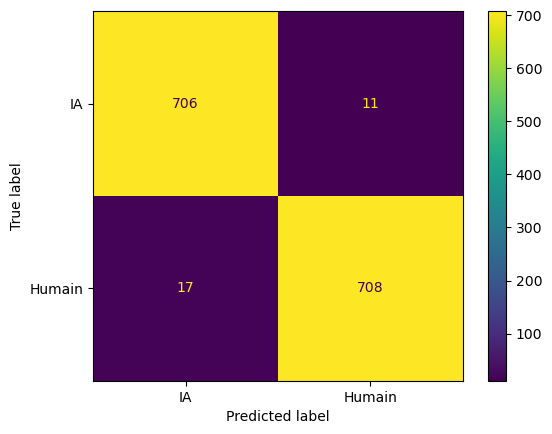

In [72]:
#Étude des performances du modèle en utilisant une matrice de confusion
cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["IA", "Humain"])
disp.plot()
plt.show()

In [73]:
# Prédiction sur le jeu de données de validation
y_pred_val = model.predict(X_val)
print("Validation Set Classification Report:\n", classification_report(y_val, y_pred_val, target_names=["IA", "Humain"]))
print("R2 Score: ", r2_score(y_val, y_pred_val))

Validation Set Classification Report:
               precision    recall  f1-score   support

          IA       0.98      0.98      0.98       729
      Humain       0.98      0.98      0.98       713

    accuracy                           0.98      1442
   macro avg       0.98      0.98      0.98      1442
weighted avg       0.98      0.98      0.98      1442

R2 Score:  0.9223205336134535


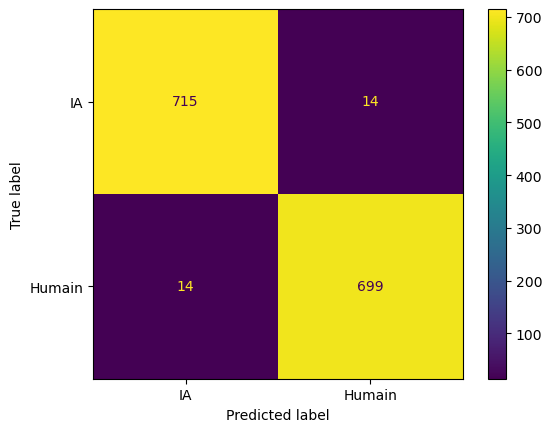

In [74]:
#Étude des performances du modèle en utilisant une matrice de confusion
cm = confusion_matrix(y_val, y_pred_val, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["IA", "Humain"])
disp.plot()
plt.show()